In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D3FD3"]

palette={
    "A100B10": ingeo_colours[6],
           "A100": ingeo_colours[7]
}

In [106]:
FOXC1_PROP = pd.read_csv('FOXC1_PROP.csv')
HAND1_PROP = pd.read_csv('HAND1_PROP.csv')
TBXT_SOX17_SOX2_PROP = pd.read_csv('TBXT_SOX17_SOX2_PROP.csv')
Pluri_PROP = pd.read_csv('/nemo/lab/santoss/home/users/ingeo/Analysis/Image_analysis/OI_20240611_TimecoursePluripotency/OI_20240606_Pluripotency_Timecourse_SOX2NANOGPOU5F1_002/Pluri.csv')



In [107]:
FOXC1_PROP[['Treatment', 'Time', 'Repeat']] = FOXC1_PROP['Condition'].str.split('_', expand=True)
HAND1_PROP[['Treatment', 'Time', 'Repeat']] = HAND1_PROP['Condition'].str.split('_', expand=True)
TBXT_SOX17_SOX2_PROP[['Treatment', 'Time', 'Repeat']] = TBXT_SOX17_SOX2_PROP['Condition'].str.split('_', expand=True)

In [108]:
FOXC1_PROP = FOXC1_PROP.loc[(~FOXC1_PROP.Time.isin(['96'])) & (FOXC1_PROP.Treatment.isin(['A100B10','A100']))]
HAND1_PROP = HAND1_PROP.loc[(~HAND1_PROP.Time.isin(['96'])) & (HAND1_PROP.Treatment.isin(['A100B10','A100']))]
TBXT_SOX17_SOX2_PROP = TBXT_SOX17_SOX2_PROP.loc[(~TBXT_SOX17_SOX2_PROP.Time.isin(['96'])) & (TBXT_SOX17_SOX2_PROP.Treatment.isin(['A100B10','A100']))]

In [109]:
FOXC1_PROP = FOXC1_PROP.reset_index()

In [110]:
data = pd.merge(TBXT_SOX17_SOX2_PROP, HAND1_PROP, on=['Treatment','Time', 'Repeat'])
data = pd.merge(data, FOXC1_PROP, on=['Treatment','Time', 'Repeat'])

In [111]:
data = data.loc[~data.Time.isin(['96'])]

In [112]:
Pluri_PROP['Time'] = Pluri_PROP['Duration']

In [113]:
data = data.drop(columns=["Unnamed: 0", "Count","Marker+", "Marker-"])


In [114]:
data = data[data.columns.drop(list(data.filter(regex='_x')))]
data = data[data.columns.drop(list(data.filter(regex='_y')))]
data = data[data.columns.drop(list(data.filter(regex='Marker')))]
data = data[data.columns.drop(list(data.filter(regex='Count')))]
data = data[data.columns.drop(list(data.filter(regex='Unnamed')))]

<AxesSubplot:xlabel='Time', ylabel='TBXT_prop'>

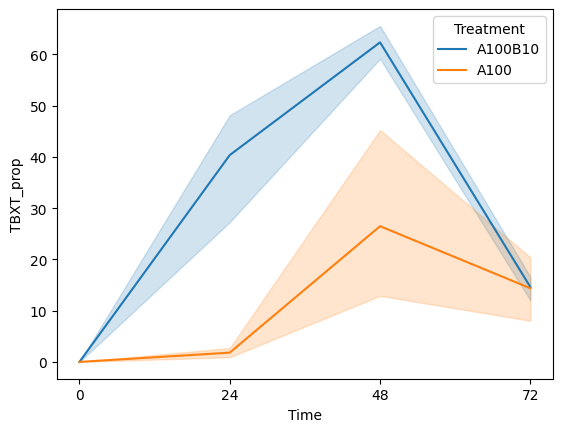

In [115]:
sns.lineplot(data=data, x="Time", y="TBXT_prop", hue="Treatment")

In [124]:
HM = data.groupby(['Treatment','Time']).mean()
HM  = HM.reset_index()
HM['Condition'] = HM[['Treatment','Time']].agg('_'.join, axis=1)
HM.index = HM.Condition
HM = HM.drop(columns=['Treatment','Time','Condition','index'])
HM = HM.T

In [125]:
HM_P = Pluri_PROP.groupby(['Treatment','Time']).mean()
HM_P  = HM_P.reset_index()
HM_P['Time'] = HM_P['Time'].astype(str)
HM_P['Condition'] = HM_P[['Treatment','Time']].agg('_'.join, axis=1)
HM_P.index = HM_P.Condition
HM_P = HM_P.drop(columns=['Treatment','Time','Condition','Unnamed: 0','Duration'])
HM_P = HM_P.T

In [126]:
HM_P

Condition,A100_0,A100_24,A100_48,A100_72,A100B10_0,A100B10_24,A100B10_48,A100B10_72
NANOG,78.100000,89.600000,92.666667,84.233333,78.100000,89.433333,75.033333,65.4
SOX2,93.433333,94.200000,81.966667,63.366667,93.433333,84.766667,58.733333,39.5
POU5F1,96.100000,97.566667,98.100000,92.833333,96.100000,97.666667,97.633333,78.9


In [127]:
HM = HM[['A100B10_0', 'A100B10_24', 'A100B10_48', 'A100B10_72', 'A100_0', 'A100_24', 'A100_48', 'A100_72']]
HM_P = HM_P[['A100B10_0', 'A100B10_24', 'A100B10_48', 'A100B10_72', 'A100_0', 'A100_24', 'A100_48', 'A100_72']]

In [128]:
HM

Condition,A100B10_0,A100B10_24,A100B10_48,A100B10_72,A100_0,A100_24,A100_48,A100_72
TBXT_prop,0.000000,40.346168,62.337838,14.608366,0.000000,1.812097,26.478191,14.370126
SOX17_prop,0.000000,0.114505,49.610360,69.948254,0.000000,0.000000,2.037015,31.368314
SOX2_prop,73.399665,74.065940,10.000000,9.342502,73.399665,98.522708,65.264878,55.229930
GATA6_prop,0.000000,0.803115,53.670657,76.068303,0.000000,0.000000,10.145192,34.620788
HAND1_prop,0.000000,0.046361,6.563883,9.666864,0.000000,0.134555,0.018028,0.254447
FOXC1_prop,0.491814,21.679434,14.668864,1.408027,0.491814,0.338330,0.263255,1.855768


In [129]:
HM.index = list(['TBXT','SOX17','SOX2','GATA6','HAND1','FOXC1'])

In [130]:
HM_P = HM_P.drop(['SOX2'], axis=0)

In [134]:
HM = pd.concat([HM, HM_P])

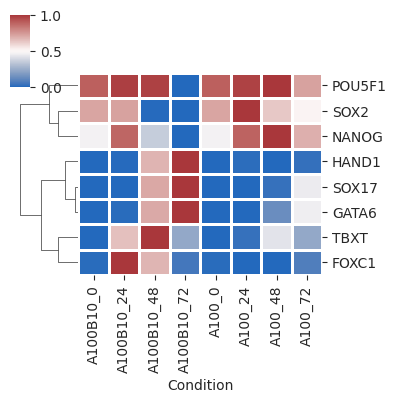

In [156]:

HM_plot = sns.clustermap(HM, col_cluster=False, standard_scale=0, figsize=(4,4), center=0.5, cmap="vlag", linewidth=1)

HM_plot.savefig('HM_plot_proportions.pdf', dpi=300)

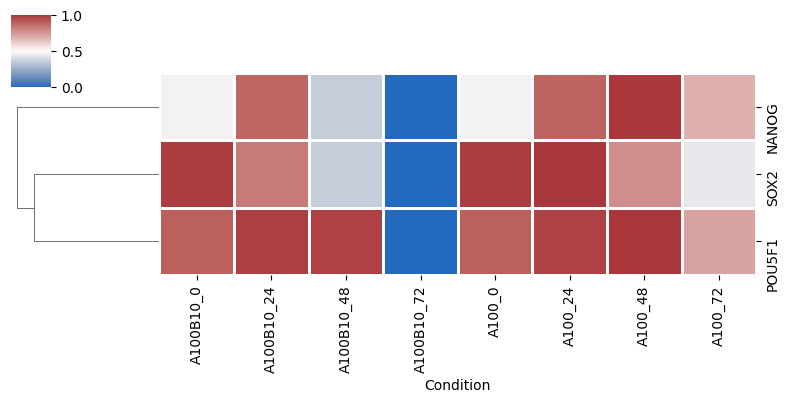

In [82]:
sns.clustermap(HM_P, col_cluster=False, standard_scale=0, figsize=(8,4), center=0.5, cmap="vlag", linewidth=1)

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


# Function to smooth data using spline interpolation
def smooth_data(x, y, smoothing_factor=1000):
    spline = UnivariateSpline(x, y, s=smoothing_factor)
    smoothed_x = np.linspace(x.min(), x.max(), 1000)  # Adjust 1000 based on data density if needed
    smoothed_y = spline(smoothed_x)
    return smoothed_x, smoothed_y


def lineage_line(Lineage_data, goi,color):
    data = {
        'Time': Lineage_data['Time'],
        'Gene_Expression': Lineage_data[goi]
    }
    df = pd.DataFrame(data)
    
    # Calculate mean and standard deviation of gene expression per pseudotime
    grouped_df = df.groupby('Time')['Gene_Expression'].agg(['mean', 'sem']).reset_index()
    
    # Smooth the mean gene expression data
    smoothed_x, smoothed_mean = smooth_data(grouped_df['Time'], grouped_df['mean'])
    
    # Calculate upper and lower bounds for confidence interval based on standard deviation
    upper_bound = grouped_df['mean'] + 1.96 * grouped_df['sem']
    lower_bound = grouped_df['mean'] - 1.96 * grouped_df['sem']
    
    # Smooth the upper and lower bounds
    smoothed_upper_bound_x, smoothed_upper_bound_y = smooth_data(grouped_df['Time'], upper_bound)
    smoothed_lower_bound_x, smoothed_lower_bound_y = smooth_data(grouped_df['Time'], lower_bound)

    plt.plot(smoothed_x, smoothed_mean, label='Smoothed Mean', color=color)
    plt.fill_between(smoothed_upper_bound_x, smoothed_upper_bound_y, smoothed_lower_bound_y, color=color, alpha=0.3, label='95% Confidence Interval')

    #plt.xlabel('Pseudotime')
    #plt.ylabel('Gene Expression')
    plt.legend()
    plt.legend('',frameon=False)

In [137]:
Endo = data.loc[data['Treatment']=='A100B10']
Meso = data.loc[data['Treatment']=='A100']
Endo.Time = Endo.Time.astype(float)
Meso.Time = Meso.Time.astype(float)

/camp/home/ingeo/.conda/envs/Image_analysis_OI/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


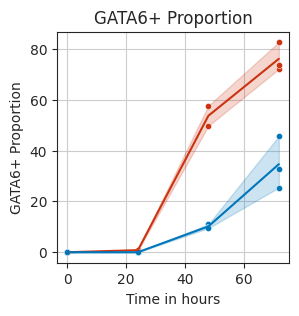

In [147]:
#sns.scatterplot(data=Endo, x='Time', y='mean_intensity_647', color='blue', s=20, alpha=0.05)
sns.set_style("ticks")
plt.figure(figsize=(3,3))

gene = 'GATA6'

sns.lineplot(data=Endo, x='Time', y=f'{gene}_prop', color=ingeo_colours[4])
sns.lineplot(data=Meso, x='Time', y=f'{gene}_prop', color=ingeo_colours[0])
sns.scatterplot(data=Endo, x='Time', y=f'{gene}_prop', color=ingeo_colours[4], s=20, marker='o')
sns.scatterplot(data=Meso, x='Time', y=f'{gene}_prop', color=ingeo_colours[0], s=20, marker='o')


plt.ylabel(f"{gene}+ Proportion")
plt.title(f"{gene}+ Proportion")

plt.xlabel("Time in hours")

plt.legend('',frameon=False)
plt.grid()
plt.savefig(f"{gene}_proportion.pdf")